In [11]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                           random_state=20, n_clusters_per_class=1)

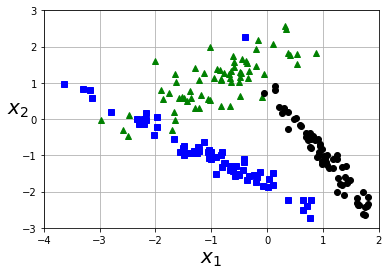

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ko")
    
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-4, 2, -3, 3])
plt.show()

In [13]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1)
softmax_reg.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

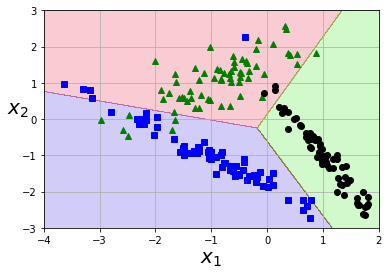

In [15]:
plot_dataset(X, y, [-4, 2, -3, 3])
plot_predictions(softmax_reg, [-4, 2, -3, 3])

In [26]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_std_model = Pipeline([
        ("Poly", PolynomialFeatures(degree=5)),
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1))
    ])
poly_std_model.fit(X,y)

Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

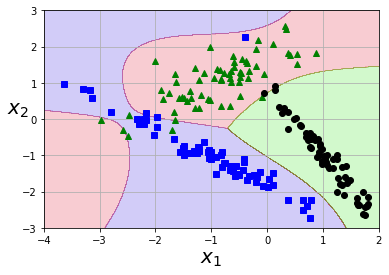

In [27]:
plot_dataset(X, y, [-4, 2, -3, 3])
plot_predictions(poly_std_model, [-4, 2, -3, 3])